<a href="https://colab.research.google.com/github/andersod55123456789/Dales_code_box/blob/main/CNN_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initializing CNN Learning Visualizer...
Generating CNN learning visualization...
Generating frame 1/25
Generating frame 2/25
Generating frame 3/25
Generating frame 4/25
Generating frame 5/25
Generating frame 6/25
Generating frame 7/25
Generating frame 8/25
Generating frame 9/25
Generating frame 10/25
Generating frame 11/25
Generating frame 12/25
Generating frame 13/25
Generating frame 14/25
Generating frame 15/25
Generating frame 16/25
Generating frame 17/25
Generating frame 18/25
Generating frame 19/25
Generating frame 20/25
Generating frame 21/25
Generating frame 22/25
Generating frame 23/25
Generating frame 24/25
Generating frame 25/25
Creating GIF...


/tmp/ipython-input-2210600714.py:191: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_path)


GIF saved as cnn_learning_animation.gif

✅ CNN learning animation saved to: cnn_learning_animation.gif

The GIF shows:
- Training loss decreasing over time
- Validation accuracy improving
- Convolutional filters evolving from noise to edge detectors
- Feature maps becoming more structured
- Network connections strengthening (visual metaphor)

Displaying the generated GIF:


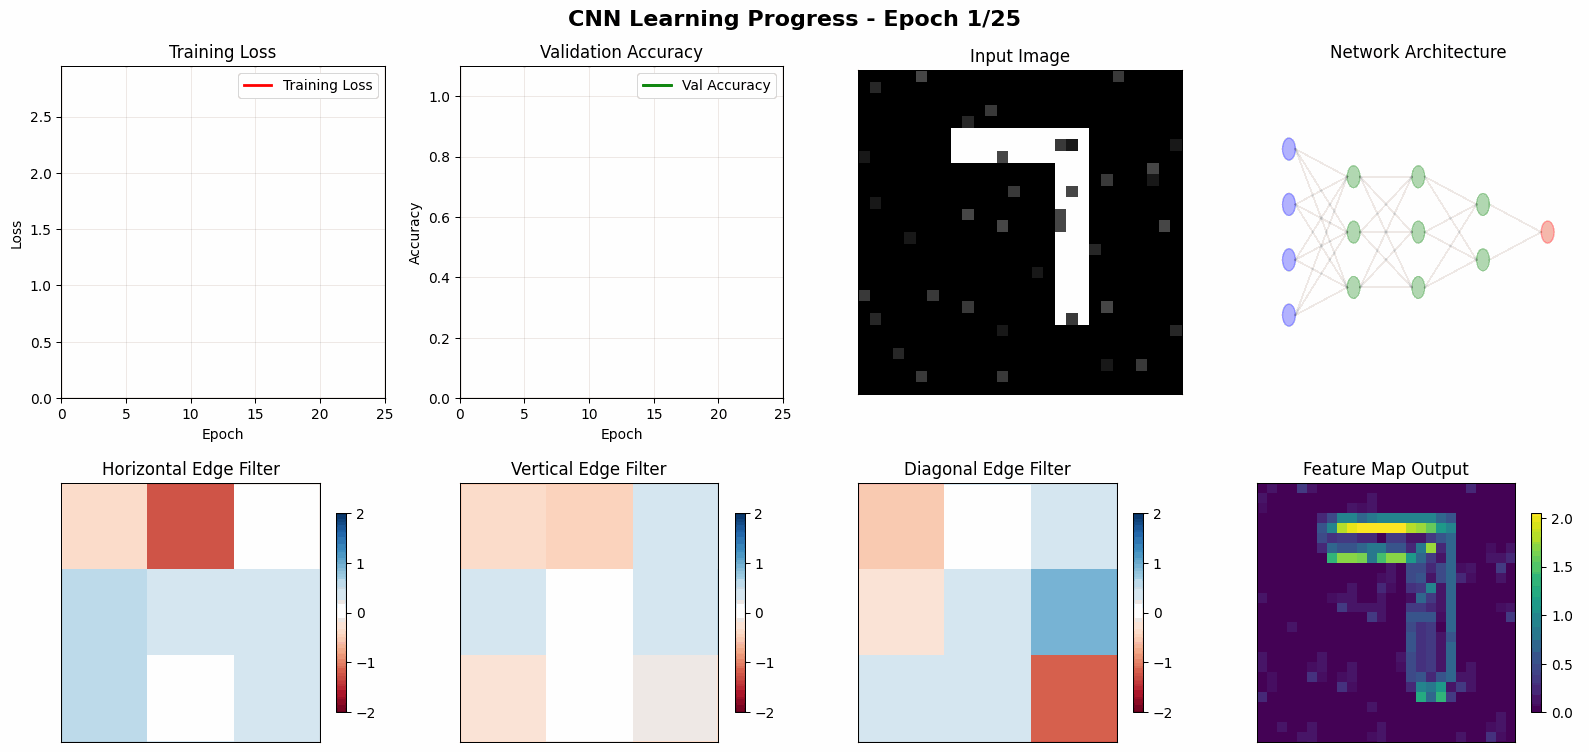

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import imageio
import os
from PIL import Image

class CNNLearningVisualizer:
    def __init__(self, num_epochs=50, input_size=28):
        self.num_epochs = num_epochs
        self.input_size = input_size
        self.setup_data()

    def setup_data(self):
        """Generate synthetic data simulating CNN training"""
        # Simulate training loss (exponential decay with noise)
        epochs = np.arange(self.num_epochs)
        base_loss = 2.5 * np.exp(-epochs / 15) + 0.1
        noise = np.random.normal(0, 0.05, self.num_epochs)
        self.train_loss = np.maximum(base_loss + noise, 0.05)

        # Simulate validation accuracy (sigmoid curve with noise)
        base_acc = 0.95 / (1 + np.exp(-(epochs - 20) / 8))
        acc_noise = np.random.normal(0, 0.02, self.num_epochs)
        self.val_accuracy = np.clip(base_acc + acc_noise, 0, 1)

        # Generate evolving filters (3x3 conv filters)
        self.filters = []
        for epoch in range(self.num_epochs):
            # Start with random noise, evolve to edge detectors
            progress = epoch / self.num_epochs

            # Horizontal edge detector
            h_edge = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) * progress
            # Vertical edge detector
            v_edge = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) * progress
            # Diagonal edge detector
            d_edge = np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]]) * progress

            # Add some noise for realism
            noise_factor = (1 - progress) * 0.5
            h_edge += np.random.normal(0, noise_factor, (3, 3))
            v_edge += np.random.normal(0, noise_factor, (3, 3))
            d_edge += np.random.normal(0, noise_factor, (3, 3))

            self.filters.append([h_edge, v_edge, d_edge])

        # Generate sample input image (handwritten digit-like)
        self.input_image = self.create_sample_digit()

        # Generate feature maps for each epoch
        self.feature_maps = []
        for epoch in range(self.num_epochs):
            maps = []
            for filter_kernel in self.filters[epoch]:
                # Simple convolution simulation
                feature_map = np.zeros((26, 26))  # 28-3+1 = 26
                for i in range(26):
                    for j in range(26):
                        feature_map[i, j] = np.sum(
                            self.input_image[i:i+3, j:j+3] * filter_kernel
                        )
                maps.append(feature_map)
            self.feature_maps.append(maps)

    def create_sample_digit(self):
        """Create a simple handwritten digit-like pattern"""
        img = np.zeros((28, 28))

        # Draw a "7"-like shape
        img[5:8, 8:20] = 1.0  # horizontal line
        img[8:22, 17:20] = 1.0  # diagonal line

        # Add some noise
        noise_mask = np.random.random((28, 28)) < 0.05
        img[noise_mask] = np.random.random(np.sum(noise_mask)) * 0.3

        return img

    def animate_frame(self, epoch):
        """Create a single frame of the animation"""
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle(f'CNN Learning Progress - Epoch {epoch+1}/{self.num_epochs}',
                    fontsize=16, fontweight='bold')

        # Plot 1: Training Loss
        ax = axes[0, 0]
        ax.plot(range(epoch+1), self.train_loss[:epoch+1], 'r-', linewidth=2, label='Training Loss')
        ax.set_xlim(0, self.num_epochs)
        ax.set_ylim(0, max(self.train_loss) * 1.1)
        ax.set_title('Training Loss')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.grid(True, alpha=0.3)
        ax.legend()

        # Plot 2: Validation Accuracy
        ax = axes[0, 1]
        ax.plot(range(epoch+1), self.val_accuracy[:epoch+1], 'g-', linewidth=2, label='Val Accuracy')
        ax.set_xlim(0, self.num_epochs)
        ax.set_ylim(0, 1.1)
        ax.set_title('Validation Accuracy')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.grid(True, alpha=0.3)
        ax.legend()

        # Plot 3: Input Image
        ax = axes[0, 2]
        ax.imshow(self.input_image, cmap='gray')
        ax.set_title('Input Image')
        ax.set_xticks([])
        ax.set_yticks([])

        # Plot 4: Network Architecture Visualization
        ax = axes[0, 3]
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 6)

        # Draw simple network layers
        layer_positions = [1, 3, 5, 7, 9]
        layer_sizes = [4, 3, 3, 2, 1]

        for i, (pos, size) in enumerate(zip(layer_positions, layer_sizes)):
            for j in range(size):
                y_pos = 3 - size/2 + j + 0.5
                circle = plt.Circle((pos, y_pos), 0.2,
                                  color='blue' if i == 0 else 'red' if i == len(layer_positions)-1 else 'green',
                                  alpha=0.3 + 0.7 * (epoch / self.num_epochs))
                ax.add_patch(circle)

        # Draw connections
        for i in range(len(layer_positions)-1):
            for j in range(layer_sizes[i]):
                for k in range(layer_sizes[i+1]):
                    y1 = 3 - layer_sizes[i]/2 + j + 0.5
                    y2 = 3 - layer_sizes[i+1]/2 + k + 0.5
                    ax.plot([layer_positions[i]+0.2, layer_positions[i+1]-0.2],
                           [y1, y2], 'k-', alpha=0.1 + 0.4 * (epoch / self.num_epochs))

        ax.set_title('Network Architecture')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

        # Plot 5-7: Learned Filters
        filter_titles = ['Horizontal Edge', 'Vertical Edge', 'Diagonal Edge']
        for i in range(3):
            ax = axes[1, i]
            im = ax.imshow(self.filters[epoch][i], cmap='RdBu', vmin=-2, vmax=2)
            ax.set_title(f'{filter_titles[i]} Filter')
            ax.set_xticks([])
            ax.set_yticks([])
            plt.colorbar(im, ax=ax, shrink=0.6)

        # Plot 8: Feature Map (from first filter)
        ax = axes[1, 3]
        feature_map = np.abs(self.feature_maps[epoch][0])  # Take absolute value for visualization
        im = ax.imshow(feature_map, cmap='viridis')
        ax.set_title('Feature Map Output')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar(im, ax=ax, shrink=0.6)

        plt.tight_layout()

        # Save frame as image
        frame_path = f'temp_frame_{epoch:03d}.png'
        plt.savefig(frame_path, dpi=100, bbox_inches='tight')
        plt.close()

        return frame_path

    def create_gif(self, output_path='cnn_learning.gif', fps=5):
        """Generate the complete GIF"""
        print("Generating CNN learning visualization...")

        frame_paths = []

        # Generate all frames
        for epoch in range(self.num_epochs):
            print(f"Generating frame {epoch+1}/{self.num_epochs}")
            frame_path = self.animate_frame(epoch)
            frame_paths.append(frame_path)

        # Create GIF from frames
        print("Creating GIF...")
        with imageio.get_writer(output_path, mode='I', fps=fps, loop=0) as writer:
            for frame_path in frame_paths:
                image = imageio.imread(frame_path)
                writer.append_data(image)

        # Clean up temporary files
        for frame_path in frame_paths:
            os.remove(frame_path)

        print(f"GIF saved as {output_path}")
        return output_path

# Usage - Perfect for Google Colab
if __name__ == "__main__":
    # Install required packages (uncomment if needed in Colab)
    # !pip install imageio matplotlib numpy pillow

    # Create visualizer
    print("Initializing CNN Learning Visualizer...")
    visualizer = CNNLearningVisualizer(num_epochs=25)  # Reduced for faster generation

    # Generate GIF
    gif_path = visualizer.create_gif('cnn_learning_animation.gif', fps=4)

    print(f"\n✅ CNN learning animation saved to: {gif_path}")
    print("\nThe GIF shows:")
    print("- Training loss decreasing over time")
    print("- Validation accuracy improving")
    print("- Convolutional filters evolving from noise to edge detectors")
    print("- Feature maps becoming more structured")
    print("- Network connections strengthening (visual metaphor)")

    # Display the GIF in Colab
    from IPython.display import Image as IPImage, display
    print(f"\nDisplaying the generated GIF:")
    display(IPImage(gif_path))

    # Also provide download link
    from google.colab import files
    print("\nDownloading GIF to your local machine...")
    files.download(gif_path)